## Alternative Model (Preprocessing)
You need to run this before you run notebook 5b.

The wavs in your dataset will be converted to 9bit linear and 80-band mels.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math, pickle, os, glob
import numpy as np
from utils import *
from dsp import *
from tqdm import tqdm
from IPython.display import Audio
import nnmnkwii
from nnmnkwii import preprocessing as P

In [2]:
bits = 9
notebook_name = 'nb5'

In [17]:
# Point SEG_PATH to a folder containing your training wavs 
# Doesn't matter if it's LJspeech, CMU Arctic etc. it should work fine
SEG_PATH = '/home/gary/DL_Projects/Datasets/TTS_DATA/LJ_SPeech_1.1/' 
DATA_PATH = 'data/nb5/'

if not os.path.exists(DATA_PATH):
    os.mkdir("data")
    os.mkdir(DATA_PATH)
    os.mkdir(DATA_PATH+"mel/")
    os.mkdir(DATA_PATH+"quant/")

In [18]:
def get_file(path):
    files = os.listdir(path)
    finals = [path+file for file in files]
    return finals

In [19]:
wav_files = get_file(SEG_PATH)
wav_files[0]

'/home/gary/DL_Projects/Datasets/TTS_DATA/LJ_SPeech_1.1/LJ020-0060.wav'

In [20]:
def convert_file(path) :
    wav = load_wav(path, encode=False)
    mel = melspectrogram(wav)
    quant = (wav + 1.) * (2**bits - 1) / 2
    return mel.astype(np.float32), quant.astype(np.int)

In [21]:
QUANT_PATH = DATA_PATH + 'quant/'
MEL_PATH = DATA_PATH + 'mel/'

In [22]:
wav_files[0].split('/')[-1][:-4]

'LJ020-0060'

In [23]:
# This will take a while depending on size of dataset
dataset_ids = []
for i, path in enumerate(tqdm(wav_files)):
    id = path.split('/')[-1][:-4]
    dataset_ids += [id]
    m, x = convert_file(path)
    np.save("data/nb5/mel/"+str(id)+'.npy', m)
    np.save("data/nb5/quant/"+str(id)+'.npy', x)
    #display('%i/%i', (i + 1, len(wav_files)))

100%|██████████| 13100/13100 [06:55<00:00, 31.53it/s]


In [24]:
with open(DATA_PATH + 'dataset_ids.pkl', 'wb') as f:
    pickle.dump(dataset_ids, f)

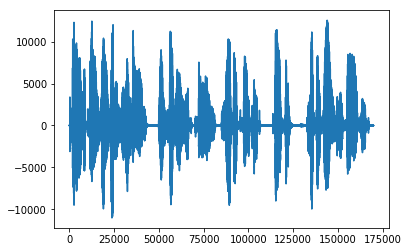

In [30]:
wav = load_wav(wav_files[0])
plt.plot(wav)
Audio(wav, rate=22050)

In [34]:
librosa.stft?